In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df[['job_title_short' , 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [6]:
help(df.explode)

Help on method explode in module pandas.core.frame:

explode(column: 'IndexLabel', ignore_index: 'bool' = False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Transform each element of a list-like to a row, replicating index values.

    Parameters
    ----------
    column : IndexLabel
        Column(s) to explode.
        For multiple columns, specify a non-empty list with each element
        be str or tuple, and all specified columns their list-like data
        on same row of the frame must have matching length.

        .. versionadded:: 1.3.0
            Multi-column explode

    ignore_index : bool, default False
        If True, the resulting index will be labeled 0, 1, …, n - 1.

    Returns
    -------
    DataFrame
        Exploded lists to rows of the subset columns;
        index will be duplicated for these rows.

    Raises
    ------
    ValueError :
        * If columns of the frame are not unique.
        * If specified columns to explode is empty

In [9]:
df_exploded = df.explode('job_skills')
df_exploded
# df is divided into duplicated values split by job_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


<Axes: xlabel='job_skills'>

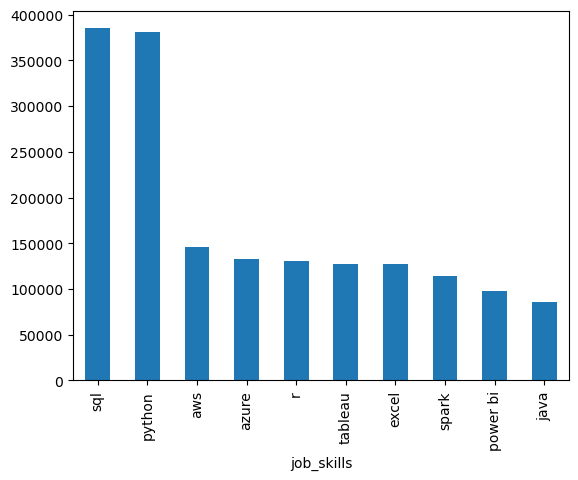

In [12]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [14]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [15]:
type(skills_count)

pandas.core.series.Series

In [17]:
# convert series to dataframe (using reset_index)

df_skills_count = skills_count.reset_index()

df_skills_count

# we can see (previous) index col is named 0


,job_title_short,job_skills,0
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [22]:
df_skills_count = skills_count.reset_index(name = 'skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending = False)

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


<Axes: >

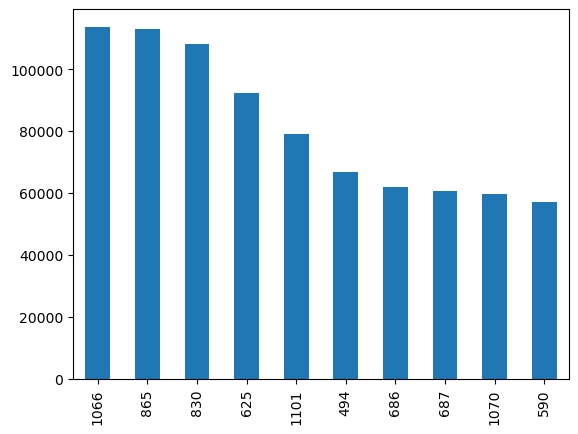

In [25]:
df_skills_count['skill_count'].head(10).plot(kind='bar')

# this is the wrong way to plot the bar graph for top 10 job_skills

In [32]:
job_title = 'Data Analyst'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final = df_skill_final.sort_values(by='skill_count', ascending=False)

df_skill_final

# the below table looks good so now we can plot the graph

,job_title_short,job_skills,skill_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


<Axes: >

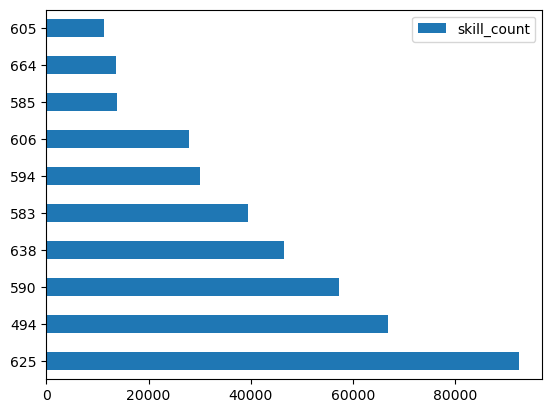

In [36]:
df_skill_final.plot(kind='barh')

# the vertical axis doesn't have the right data labels so let's fix that

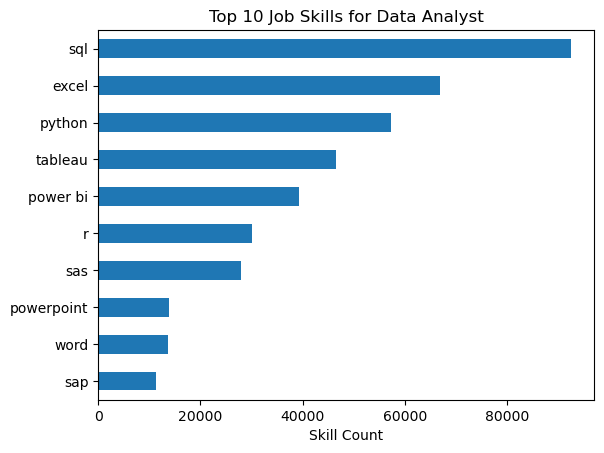

In [14]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis() # to sort the graph in descending y-axis values
plt.title(f"Top {top_skills} Job Skills for {job_title}")
plt.xlabel("Skill Count")
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()

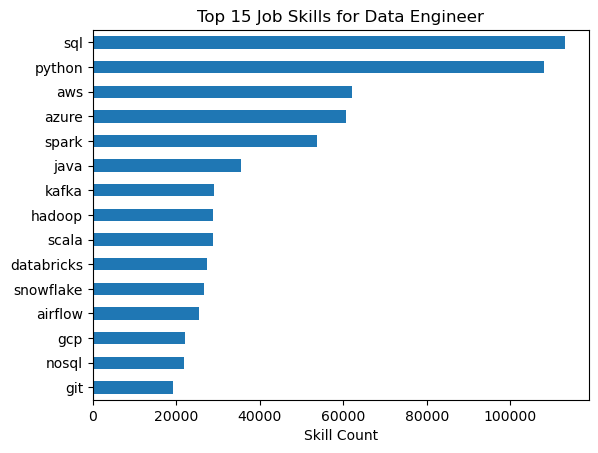

In [17]:
job_title = 'Data Engineer' # can be changed for analyzing other job titles
top_skills = 15 # can be changed for graph

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skill_final = df_skill_final.sort_values(by='skill_count', ascending=False)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis() # to sort the graph in descending y-axis values
plt.title(f"Top {top_skills} Job Skills for {job_title}")
plt.xlabel("Skill Count")
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()

In [12]:
# compiled code:

import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_exploded = df.explode('job_skills')

skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending = False)

job_title = 'Data Scientist'
top_skills = 15

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final = df_skill_final.sort_values(by='skill_count', ascending=False)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills} Job Skills for {job_title}")
plt.xlabel("Job Posting Count")
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()

MemoryError: Unable to allocate 288. MiB for an array with shape (10, 3777320) and data type object